## Convert the parameterized circuit to Ansatz

In [196]:
# General imports
import numpy as np

# Pre-defined ansatz circuit and operator class for Hamiltonian
from qiskit.circuit.library import EfficientSU2, QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

import networkx as nx

from functools import reduce

I = np.matrix(
    [[1, 0],
     [0, -1]], 
    dtype=complex
    )
Z = np.matrix(
    [[1, 0],
     [0, -1]], 
    dtype=complex
    )
def krons(oper_list):
    return reduce(np.kron, oper_list)
def zizj(n, i, j):
    oper_list = n*[I]
    oper_list[i] = Z
    oper_list[j] = Z
    return krons(oper_list)

def graph_to_h(G:nx.graph):
    num = len(G.nodes)
    edges_l = len((G.edges))
    _2n = int(2**num)
    hamiltonain = edges_l*np.eye(_2n, dtype=complex)
    for edge in set(G.edges):
        a, b = edge
        ZiZj = zizj(num, a-1,b-1)
        hamiltonain = hamiltonain - ZiZj
    return hamiltonain
def graph_to_qiskit(G:nx.graph):
    num = len(G.nodes)
    print(num)
    edges_l = len((G.edges))
    _2n = int(2**num)
    p_strs = []
    for edge in set(G.edges):
        i1, i2 = edge
        l = num*["I"]
        l[i1-1] = "Z"
        l[i2-1] = "Z"
        p_strs.append("".join(l))
    qiskit_hamiltonian= SparsePauliOp.from_list(
            [(num*"I", -num/2)]+[(p, 0.5) for p in p_strs]
        )
    return qiskit_hamiltonian, p_strs

## Graph problem

In [152]:
import networkx as nx

In [153]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from(
    [   (1, 2),(1, 3),(1, 4),(1, 5),(2, 3),(2, 5),
        (2, 6),(3, 4),(3, 5),(3, 6),(4, 5),(4, 6), (5, 6),
    ]
)
G_4 = nx.Graph()
G_4.add_nodes_from([0,1,2,3])
G_4.add_edges_from(
    [(0,1), (1, 2), (2, 3), (3, 0), (0, 2), (1, 3)]
)

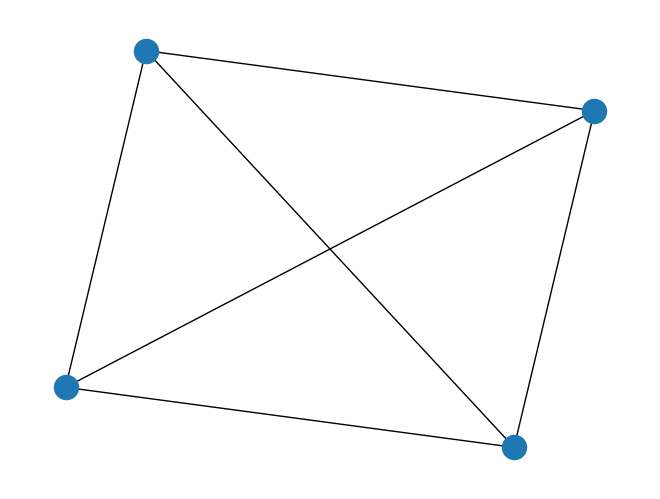

In [154]:
nx.draw(G_4)

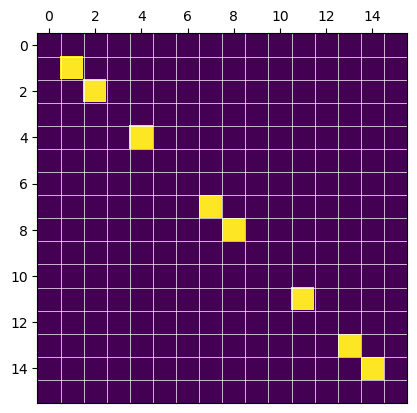

In [155]:
h_matrix = graph_to_h(G_4)
plt.imshow(h_matrix.real)
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
line_data = np.arange(17)-0.5
for x in line_data:
    plt.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
# Add horizontal grid lines
for y in line_data:
    plt.axhline(y=y, color='white', linestyle='-', linewidth=0.5)

In [206]:
h_matrix.max()/3

(4+0j)

In [207]:
np.diag(h_matrix)

array([ 0.+0.j, 12.+0.j, 12.+0.j,  0.+0.j, 12.+0.j,  0.+0.j,  0.+0.j,
       12.+0.j, 12.+0.j,  0.+0.j,  0.+0.j, 12.+0.j,  0.+0.j, 12.+0.j,
       12.+0.j,  0.+0.j])

In [197]:
qiskit_h, pstrs = graph_to_qiskit(G_4)

4


In [208]:
pstrs

['ZIIZ', 'ZZII', 'IIZZ', 'IZZI', 'IZIZ', 'ZIZI']

In [209]:
num=6

In [210]:
[(4*"I", -num/2)]+[(p, 0.5) for p in pstrs]

[('IIII', -3.0),
 ('ZIIZ', 0.5),
 ('ZZII', 0.5),
 ('IIZZ', 0.5),
 ('IZZI', 0.5),
 ('IZIZ', 0.5),
 ('ZIZI', 0.5)]

In [212]:
ops = SparsePauliOp.from_list([(4*"I", -num/2)]+[(p, 0.5) for p in pstrs])

In [158]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

In [239]:
thetas = [Parameter(f"theta_{i}") for i in range(8)]
phis = [Parameter(f"phi_{i}") for i in range(12)]

In [240]:
qc = QuantumCircuit(4)

In [241]:
qc.rx(thetas[0],0)
qc.rx(thetas[1],1)
qc.rx(thetas[2],2)
qc.rx(thetas[3],3)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(0, 2)
qc.rz(phis[0],1)
qc.rz(phis[1],2)
qc.rz(phis[2],3)
qc.cx(0, 2)
qc.cx(2, 3)
qc.cx(0, 1)

#-----------------
qc.cx(3, 0)
qc.cx(1, 2)
qc.cx(1, 3)
qc.rz(phis[3],0)
qc.rz(phis[4],2)
qc.rz(phis[5],3)
qc.cx(1, 3)
qc.cx(1, 2)
qc.cx(3, 0)

#=====================
qc.rx(thetas[4],0)
qc.rx(thetas[5],1)
qc.rx(thetas[6],2)
qc.rx(thetas[7],3)

qc.cx(0, 1)
qc.cx(2, 3)
qc.cx(0, 2)
qc.rz(phis[6],1)
qc.rz(phis[7],2)
qc.rz(phis[8],3)
qc.cx(0, 2)
qc.cx(2, 3)
qc.cx(0, 1)

#-----------------
qc.cx(3, 0)
qc.cx(1, 2)
qc.cx(1, 3)
qc.rz(phis[9],0)
qc.rz(phis[10],2)
qc.rz(phis[11],3)
qc.cx(1, 3)
qc.cx(1, 2)
qc.cx(3, 0)



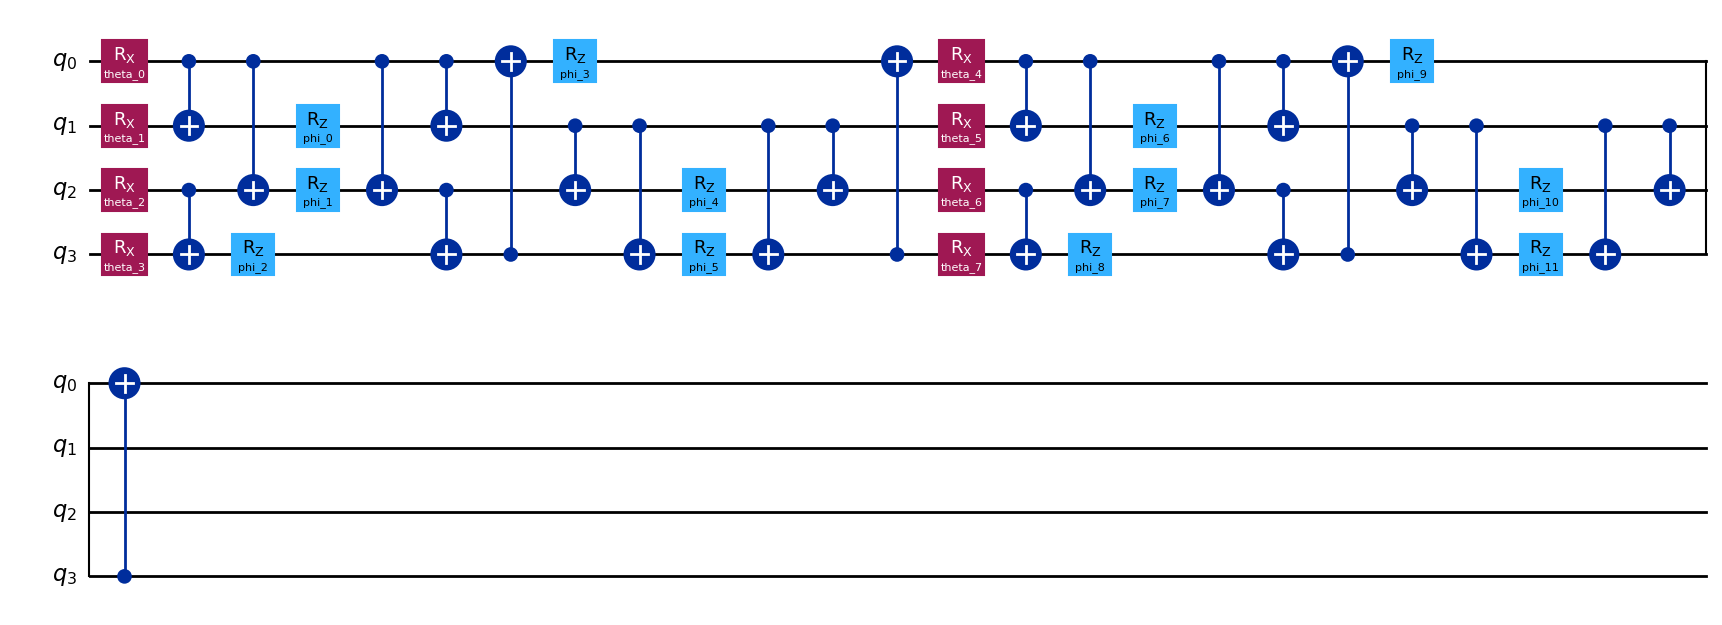

In [243]:
qc.draw("mpl")

In [244]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator


In [245]:
from qiskit.quantum_info import Operator

In [246]:
qiskit_hamiltonian = Operator(h_matrix)

In [247]:
qiskit_h

SparsePauliOp(['IIII', 'ZIIZ', 'ZZII', 'IIZZ', 'IZZI', 'IZIZ', 'ZIZI'],
              coeffs=[-2. +0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j])

In [248]:
estimator = Estimator()
x0 = np.pi/2 * np.random.random(8+12)
params = x0
pub = (qc.decompose(), [ops], [params])

In [249]:
result = estimator.run(pubs=[pub]).result()
energy = result[0].data.evs[0]
print(energy)

-1.9905411151610153


In [250]:
cost_history_dict = {
    "prev_vector": 0 * np.random.random(8+12),
    "iters": 0,
    "cost_history": [],
}

In [251]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """

    pub = (ansatz, [hamiltonian], [params])
    print(estimator)
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy}]")

    return energy

In [252]:
estimator = Estimator()
res = minimize(
    cost_func,
    cost_history_dict["prev_vector"],
    args = (qc.decompose(), qiskit_h, estimator),
    method="cobyla",
    options={"maxiter":4000}
)

Iters. done: 1 [Current cost: 1.0]
Iters. done: 2 [Current cost: 1.0]
Iters. done: 3 [Current cost: 1.0]
Iters. done: 4 [Current cost: 1.0]
Iters. done: 5 [Current cost: 1.0]
Iters. done: 6 [Current cost: 1.0]
Iters. done: 7 [Current cost: 1.0]
Iters. done: 8 [Current cost: 1.0]
Iters. done: 9 [Current cost: 1.0]
Iters. done: 10 [Current cost: 1.0]
Iters. done: 11 [Current cost: 1.0]
Iters. done: 12 [Current cost: 1.0]
Iters. done: 13 [Current cost: 1.0]
Iters. done: 14 [Current cost: 0.31045345880220965]
Iters. done: 15 [Current cost: -0.273432097400506]
Iters. done: 16 [Current cost: -0.751656668608147]
Iters. done: 17 [Current cost: -1.1242202548207145]
Iters. done: 18 [Current cost: -1.8993777704595853]
Iters. done: 19 [Current cost: -2.2171378050849953]
Iters. done: 20 [Current cost: -2.0775003586969403]
Iters. done: 21 [Current cost: -2.0775003586969403]
Iters. done: 22 [Current cost: -2.167434650673474]
Iters. done: 23 [Current cost: -2.098166068498098]
Iters. done: 24 [Current 

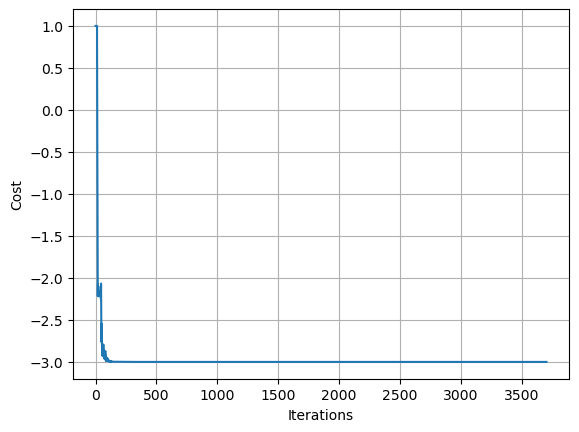

In [253]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.grid()
plt.draw()

In [254]:
pre_params = cost_history_dict["prev_vector"]

In [310]:
list(qc.parameters)

[Parameter(phi_0),
 Parameter(phi_1),
 Parameter(phi_10),
 Parameter(phi_11),
 Parameter(phi_2),
 Parameter(phi_3),
 Parameter(phi_4),
 Parameter(phi_5),
 Parameter(phi_6),
 Parameter(phi_7),
 Parameter(phi_8),
 Parameter(phi_9),
 Parameter(theta_0),
 Parameter(theta_1),
 Parameter(theta_2),
 Parameter(theta_3),
 Parameter(theta_4),
 Parameter(theta_5),
 Parameter(theta_6),
 Parameter(theta_7)]

In [255]:
pre_params

array([ 6.02269953e-07, -3.63340145e-02,  2.62686592e-01,  8.18562782e-02,
        1.12874034e-03,  3.70837755e-02, -4.00786357e-02,  4.08992436e-02,
        2.35943020e-01,  3.58387500e-02, -1.86747833e-01,  5.90165840e-02,
        1.28511168e+00,  1.91162352e+00,  2.01421948e-01,  2.88409742e-01,
        1.85656315e+00,  1.22991018e+00, -2.01162701e-01, -2.88030963e-01])

In [256]:
optim_gate = qc.to_gate()

In [257]:
qc2 = QuantumCircuit(4)

In [262]:
p0 = list(qc.parameters)[0]

In [265]:
qc2.append(
    qc.assign_parameters({angle: value  for angle, value in zip(list(qc.parameters), cost_history_dict["prev_vector"])}),
    [0,1,2,3]
)

In [266]:
qc2.draw()

┌──────────────┐
q_0: ┤0             ├
     │              │
q_1: ┤1             ├
     │  circuit-651 │
q_2: ┤2             ├
     │              │
q_3: ┤3             ├
     └──────────────┘

In [272]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile

In [273]:
st_backend = Aer.get_backend("statevector_simulator")

In [274]:
circ = transpile(qc2, st_backend)

In [276]:
result = st_backend.run(circ).result()

In [282]:
state_vector =  result.data()['statevector']

In [285]:
st_np = state_vector.data

In [286]:
st_np 

array([-3.97026064e-05+9.59220366e-06j,  2.78486183e-05-1.46885004e-05j,
        1.18035192e-05+3.27322486e-05j, -9.81090865e-01-1.93335053e-01j,
        1.70017005e-05+1.27697842e-04j, -4.41247211e-04+3.74919337e-03j,
        2.21821951e-04+3.47679699e-03j, -4.06093796e-04+1.20962691e-04j,
        5.33789174e-05+1.79399100e-04j, -3.65670348e-04-5.46478777e-03j,
        5.75162509e-04-5.02247646e-03j,  2.98113657e-04-3.85672475e-05j,
       -3.74392535e-05-7.42051853e-06j, -3.69959623e-06+1.05856436e-05j,
        1.18055646e-06-1.34882317e-05j,  2.95648316e-05-4.04021938e-05j])

In [297]:
E = st_np.conj().T@h_matrix@st_np
E

matrix([[3.88852273e-06-1.90251541e-23j]])

In [299]:
np.abs(st_np)

array([4.08449180e-05, 3.14848787e-05, 3.47954475e-05, 9.99958863e-01,
       1.28824674e-04, 3.77506954e-03, 3.48386599e-03, 4.23726496e-04,
       1.87171969e-04, 5.47700832e-03, 5.05530234e-03, 3.00598045e-04,
       3.81675490e-05, 1.12135125e-05, 1.35397972e-05, 5.00641242e-05])

In [306]:
xdata = [format(i, "04b") for i in np.arange(16)]

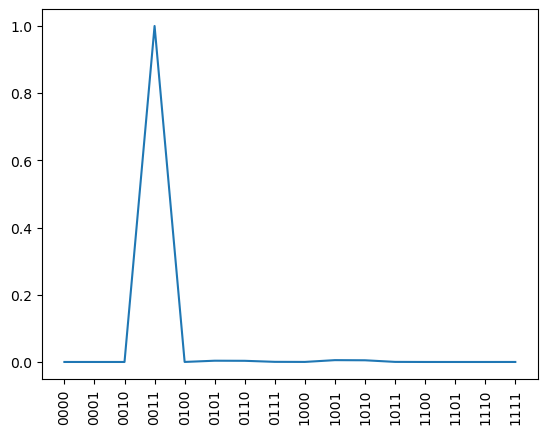

In [309]:
plt.plot(xdata, np.abs(st_np))
_ = plt.xticks(rotation=90)